In [54]:
import numpy as np
import pandas as pd
from os import chdir

In [55]:
chdir('C:/Users/82105/Desktop/kaggle/1) house prices')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [56]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


### 종속변수 정규화

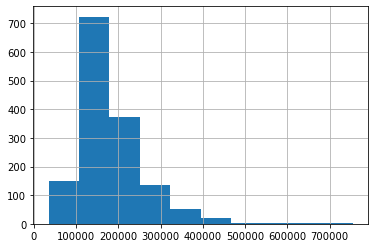

In [57]:
df_train['SalePrice'].hist()

In [58]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

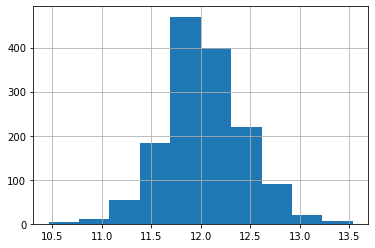

In [59]:
df_train['SalePrice'].hist()

### 결측치 확인

In [60]:
na_check = df_train.isna().sum().sort_values()
na_check.tail(20)

Utilities          0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

- **결측치 확인 결과 및 처리 가이드라인**(19)

40% 넘는 변수(5) : PoolQC, MiscFeature, Alley, Fence, FireplaceQu 

=> 컬럼 자체 제거?! mice 처리 !!

10% 넘는 변수(1) : LotFrontage

0% 넘는 변수(13)

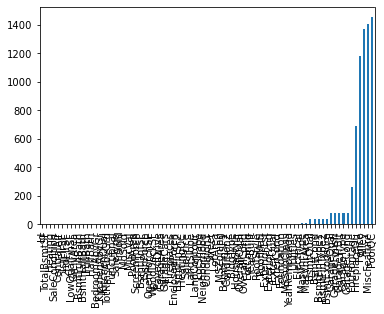

In [61]:
na_check.plot.bar()

### 열삭제

- Id : rownames를 의미하기에 제거

- Utilies : 대부분 같은 가치를 갖기에 제거

AllPub(1459), NoSewr(0), NoSeWa(1), ELO(0)

In [62]:
df_train.drop(['Id','Utilities'],axis=1,inplace=True)
df_test.drop(['Id','Utilities'],axis=1,inplace=True)

In [63]:
df_full = pd.concat([df_train, df_test])

### 결측치 처리

1) 수치형 : 연속형(20) / 등간형(18)

- **수치형(연속형, 등간형)**

#중앙값으로 처리? impy로 처리?

In [64]:
#for col in ('MasVnrArea','GarageYrBlt','LotFrontage'):
#    df_train[col] = df_train.groupby("Neighborhood")[col].transform(
#        lambda x: x.fillna(x.median()))

In [65]:
#for col in ('MasVnrArea','GarageYrBlt','LotFrontage'):
#    df_test[col] = df_test.groupby("Neighborhood")[col].transform(
#        lambda x: x.fillna(x.median()))

2) 명목형 : 범주형(32) / 순위형(11)



- **명목형(범주형)**

범주형 변수 항목에 NA가 존재한다면 None으로 처리

단, Functional은 속성에 기본값을 의미하는 속성값 Typ값으로 처리

#범주형 변수 항목에 NA가 존재하지 않다면 최빈값으로 처리(6)?, impy로 처리?


- **명목형(순서형)**

순서형 변수, 의미상 순위형 변수는 수치형으로 처리


In [66]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType'):
    df_train[col] = df_train[col].fillna('None')
df_train["Functional"] = df_train["Functional"].fillna("Typ")

#for col in ('Electrical','MasVnrType','GarageFinish','GarageType','Fence','Alley','MiscFeature'):
#    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])


df_train = df_train.replace({'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'PoolQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \

                 'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}, \
                 'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}, \
                 'Functional': {'Sel': 6, 'Sev': 5, 'Maj2': 4, 'Maj1': 3, 'Mod': 2, 'Min1': 1, 'Min2': 1, 'Typ': 0}, \
                 'BsmtExposure': {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'None': 0}, \
                 'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev': 0}, \
                 'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}, \
                 'PavedDrive': {'Y': 2, 'P': 1, 'N': 0}, \
                 'Street': {'Pave': 1, 'Grvl': 0}, \
                 'CentralAir': {'Y': 1, 'N': 0}})

In [67]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType'):
    df_test[col] = df_test[col].fillna('None')
df_test["Functional"] = df_test["Functional"].fillna("Typ")

#for col in ('Electrical','MasVnrType','GarageFinish','GarageType','Fence','Alley','MiscFeature'):
#    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])


df_test = df_test.replace({'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'PoolQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \

                 'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}, \
                 'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}, \
                 'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}, \
                 'Functional': {'Sel': 6, 'Sev': 5, 'Maj2': 4, 'Maj1': 3, 'Mod': 2, 'Min1': 1, 'Min2': 1, 'Typ': 0}, \
                 'BsmtExposure': {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'None': 0}, \
                 'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev': 0}, \
                 'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}, \
                 'PavedDrive': {'Y': 2, 'P': 1, 'N': 0}, \
                 'Street': {'Pave': 1, 'Grvl': 0}, \
                 'CentralAir': {'Y': 1, 'N': 0}})

3) impy 처리

#수치형 변수 impy로 처리?
#범주형 변수 항목에 NA가 존재하지 않다면 최빈값으로 처리(6)?, impy로 처리?

- 더미화

In [68]:
y=df_train['SalePrice']
df_train=df_train.loc[:,df_train.columns != 'SalePrice']

df_full = pd.concat([df_train, df_test])
df_full = pd.get_dummies(df_full)  #(2919*77) => (2919*229)
df_train = pd.get_dummies(df_train)  #(1460*77) => (1460*229)
df_test = pd.get_dummies(df_test)  #(1459*77) => (1459*214)

In [14]:
print(df_full.shape)
print(df_train.shape)
print(df_test.shape)

(2919, 220)
(1460, 220)
(1459, 205)


- missforest, impy

In [16]:
pip install missingpy

Note: you may need to restart the kernel to use updated packages.


In [17]:
from missingpy import MissForest

C:\Users\82105\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [77]:
impy1 = MissForest().fit_transform(df_train)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [87]:
pd.DataFrame(impy1).isna().sum()
#df_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
224    0
225    0
226    0
227    0
228    0
Length: 229, dtype: int64

In [89]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()

In [90]:
impy2 = imp.fit_transform(df_train)

In [91]:
pd.DataFrame(impy2).isna().sum()
#df_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
224    0
225    0
226    0
227    0
228    0
Length: 229, dtype: int64